### Importing all the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

Columns:
1. Age - Age of the primary beneficiary
2. Sex - Gender of the insurance contractor
3. BMI - Body mass index
4. Children - Number of children covered by health insurance per number of dependents
5. Smoker - Smoking Boolean True/False
6. Region - Northeast, southeast, southwest, northwest
7. Charges - Medical Cost/Charges

In [2]:
#import dataset 
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Exploratory Data Analysis

In [6]:
## Check for na values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no na values.

In [7]:
## check for duplicated values
df.duplicated().sum()

1

There are duplicate rows, hence it is important to remove the duplicated rows

In [8]:
df[df.duplicated(keep=False)] ## selecting rows with duplicated entries

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
df = df.drop_duplicates()
df.duplicated().sum() ## succesfully removed the duplicated entries

0

Text(0.5, 1.0, 'Distribution of Charges')

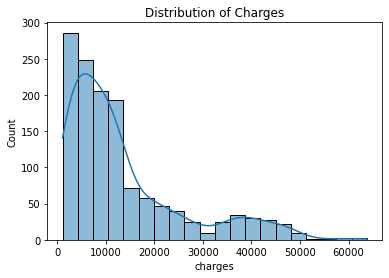

In [12]:
sns.histplot(data=df, x='charges', bins=20,kde=True)
plt.title('Distribution of Charges')

In [13]:
## Each column distribution 

<AxesSubplot:xlabel='sex', ylabel='count'>

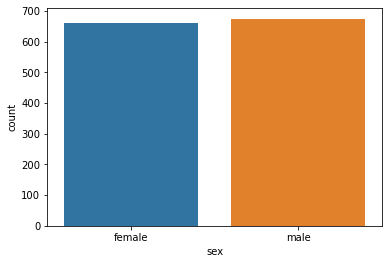

In [16]:
sns.countplot(data=df,x='sex')

<AxesSubplot:xlabel='children', ylabel='count'>

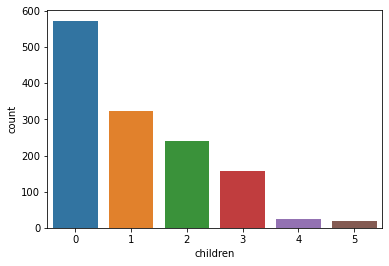

In [17]:
sns.countplot(data=df,x='children')

<AxesSubplot:xlabel='smoker', ylabel='count'>

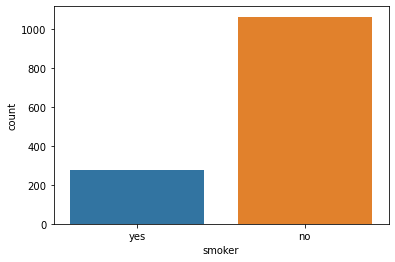

In [18]:
sns.countplot(data=df,x='smoker')

<AxesSubplot:xlabel='region', ylabel='count'>

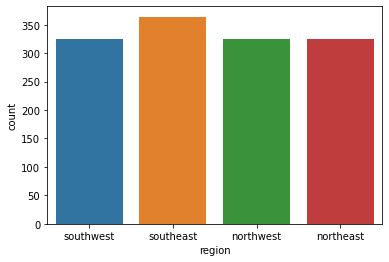

In [19]:
sns.countplot(data=df,x='region')

<AxesSubplot:xlabel='charges', ylabel='Count'>

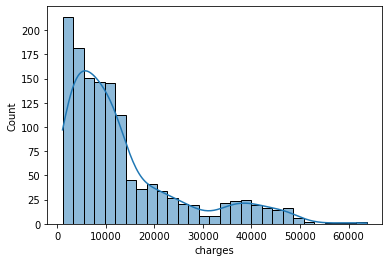

In [20]:
sns.histplot(data=df,x='charges',kde=True)

<AxesSubplot:xlabel='charges'>

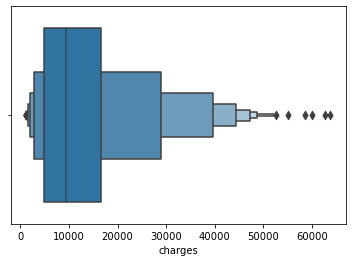

In [23]:
sns.boxenplot(data=df, x='charges')

<AxesSubplot:xlabel='charges', ylabel='Count'>

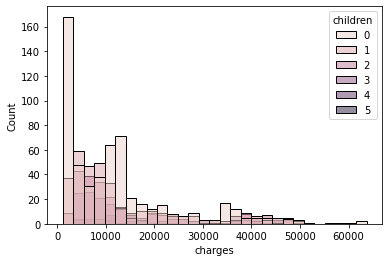

In [29]:
sns.histplot(data=df, x='charges', hue='children')

<AxesSubplot:xlabel='charges', ylabel='children'>

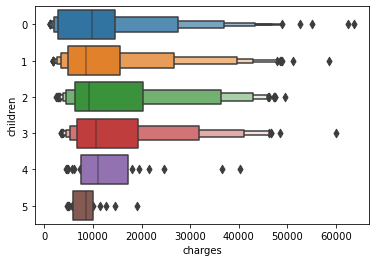

In [28]:
sns.boxenplot(data=df, x='charges',y='children',orient='h')

<AxesSubplot:xlabel='charges', ylabel='Count'>

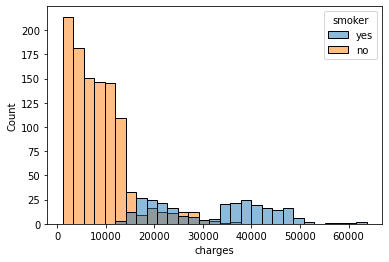

In [34]:
sns.histplot(data=df, x='charges', hue='smoker')

<AxesSubplot:xlabel='charges', ylabel='smoker'>

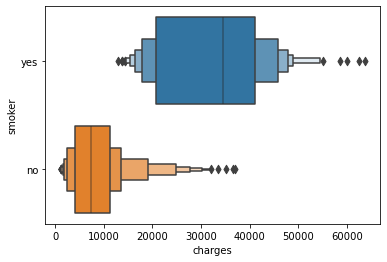

In [30]:
sns.boxenplot(data=df, x='charges',y='smoker',orient='h')

<AxesSubplot:xlabel='charges', ylabel='Count'>

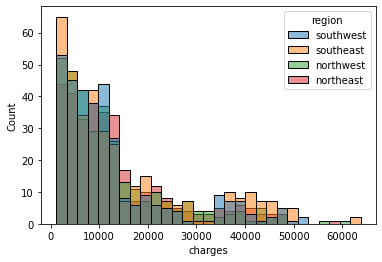

In [35]:
sns.histplot(data=df, x='charges', hue='region')

<AxesSubplot:xlabel='charges', ylabel='region'>

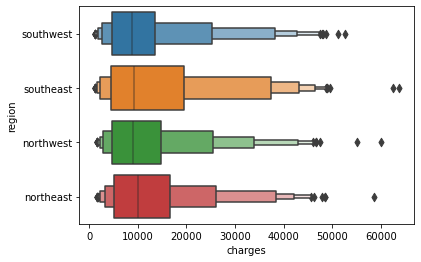

In [31]:
sns.boxenplot(data=df, x='charges',y='region',orient='h')

<AxesSubplot:xlabel='charges', ylabel='Count'>

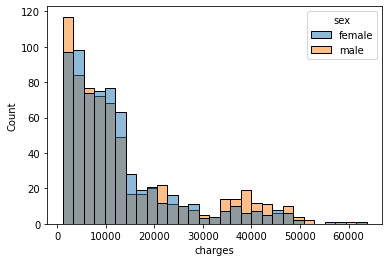

In [36]:
sns.histplot(data=df, x='charges', hue='sex')

<AxesSubplot:xlabel='charges', ylabel='sex'>

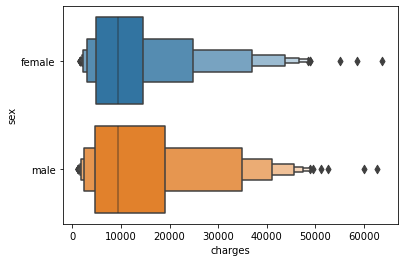

In [33]:
sns.boxenplot(data=df, x='charges',y='sex',orient='h')

In [41]:
### CHARGES VS SMOKERS

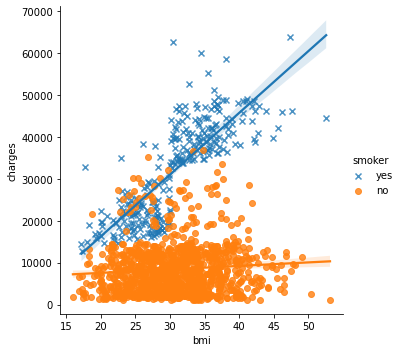

In [43]:
sns.lmplot(data=df,x='bmi',y='charges',hue='smoker',markers=['x','o'])

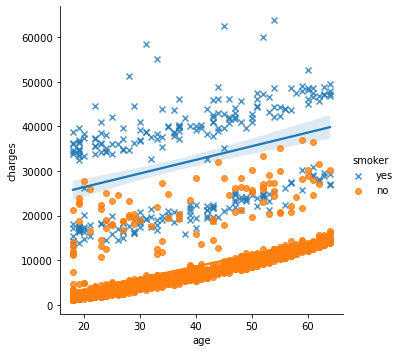

In [44]:
sns.lmplot(data=df,x='age',y='charges',hue='smoker',markers=['x','o'])

In [46]:
## Data Engineering

df_dummies = df.copy()

for i in df_dummies.columns:
    if df_dummies[i].dtype=='object':
        dummies = pd.get_dummies(df_dummies[i], prefix=f'{i}_')
        df_dummies = pd.concat([df_dummies, dummies], axis=1)
        df_dummies = df_dummies.drop(i,axis=1)

In [47]:
df_dummies.head()

,age,bmi,children,charges,sex__female,sex__male,smoker__no,smoker__yes,region__northeast,region__northwest,region__southeast,region__southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [48]:
## Changing the columns having multiple classes to binary 0 or 1
## Added the name of each category after column name 
## Similar to One hot encoding;

## Show Correlation for all features

<AxesSubplot:>

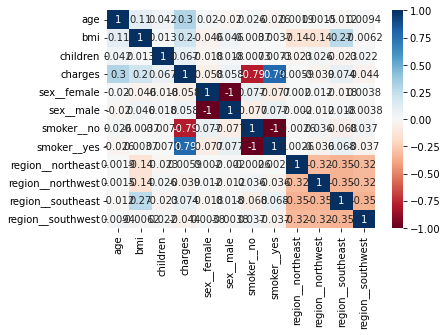

In [49]:
#figsize() -> increase the figure size 
sns.heatmap(df_dummies.corr(), annot=True,cmap='RdBu')

### Data Preperation


In [50]:
features = df_dummies.drop('charges', axis=1)
target = df_dummies[['charges']]

In [51]:
features

,age,bmi,children,sex__female,sex__male,smoker__no,smoker__yes,region__northeast,region__northwest,region__southeast,region__southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [52]:
target

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [53]:
## Train and Test Split

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target,test_size=0.15, shuffle=True)

In [57]:
print('Train Size:', X_train.shape)
print('Test Size:', X_test.shape)

Train Size: (1136, 11)
Test Size: (201, 11)


In [58]:
## 
lis_result = []

def model_prediction(model):
    fig,ax = plt.subplots(nrows=1, ncols=2,
                         figsize=(15,5), sharex=True,sharey=True)
    ax = ax.ravel()
    scores = []
    
    for index,degree in enumerate([1,2]):
        
        pipeline = Pipeline([
            ('degree', PolynomialFeatures(degree=degree)),
            ('scaled', MinMaxScaler()),
            ('model',model)
        ])
        
        pipeline.fit(X_train, Y_train)
        prediction = pipeline.predict(X_test)
        
        r2 = r2_score(prediction,y_test).round(4)
        mae = mean_absolute_error(prediction, Y_test).round(2)
        rmse = np.sqrt(mean_squared_error(prediction,Y_test)).round(2)
        
        model_name = str(model).split('(')[0]
        
        scores.append([r2,mae,rmse])
        lis_result.append([f'{model_name}, Degree={degree}', r2,mae,rmse])
        
        axs[index].scatter(prediction, Y_test, color='green', alpha=0.4)
        
        axs[index]
        

In [59]:
## https://www.kaggle.com/code/beachratchata/medical-cost-prediction-polynomial-regressions